<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/Behaviour_cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!git clone https://github.com/kiran20v/python/

fatal: destination path 'python' already exists and is not an empty directory.


In [75]:
!ls python/track_self_drive

driving_log.csv  IMG


In [76]:
!pip install imgaug

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from  sklearn.utils import shuffle
from  sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [78]:
datadir = 'python/track_self_drive'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

center  ...     speed
0  /home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_47_904.jpg  ...  0.000079
1  /home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_005.jpg  ...  0.000079
2  /home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_105.jpg  ...  0.000079
3  /home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_207.jpg  ...  0.000079
4  /home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_307.jpg  ...  0.000079

[5 rows x 7 columns]

In [79]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center  ...     speed
0  center_2019_12_10_01_36_47_904.jpg  ...  0.000079
1  center_2019_12_10_01_36_48_005.jpg  ...  0.000079
2  center_2019_12_10_01_36_48_105.jpg  ...  0.000079
3  center_2019_12_10_01_36_48_207.jpg  ...  0.000079
4  center_2019_12_10_01_36_48_307.jpg  ...  0.000079

[5 rows x 7 columns]

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


-1.0

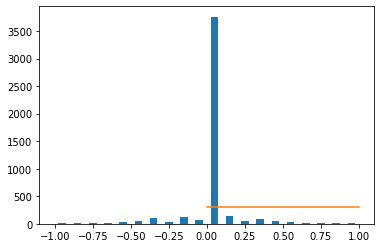

In [80]:
num_bins = 20
samples_per_bin = 300
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering']),(samples_per_bin, samples_per_bin))
np.min(data['steering'])

In [81]:
print('total data: ', len(data))
remove_list = []
for j in range(num_bins):
    bin_list = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            bin_list.append(i)
    bin_list = shuffle(bin_list)
    bin_list = bin_list[samples_per_bin:]
    remove_list.extend(bin_list)

print('removed',len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining: ', len(data))

total data:  4633
removed 6912
remaining:  847


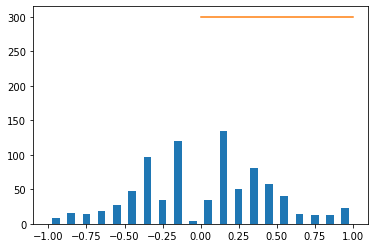

In [82]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering']),(samples_per_bin, samples_per_bin))

In [0]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right, = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [84]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training samples: ',X_train, X_valid, y_train, y_valid);

Training samples:  ['python/track_self_drive/IMG/center_2019_12_10_01_39_29_081.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_39_31_864.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_22_169.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_39_40_680.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_41_24_374.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_44_47_761.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_18_739.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_39_48_089.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_40_54_505.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_36_54_830.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_43_52_555.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_39_26_772.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_04_651.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_39_36_914.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_45_28_

Text(0.5, 1.0, 'Validation set')

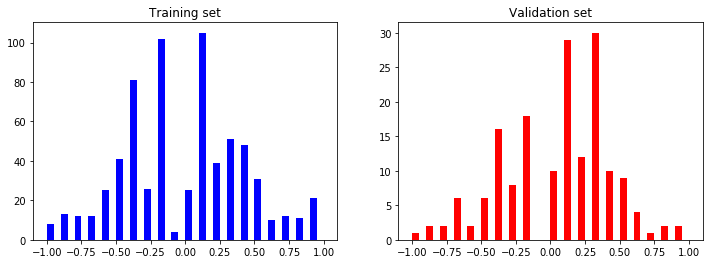

In [85]:
fig,axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(y_train, bins=num_bins, width = 0.05, color='blue')
axs[0].set_title('Training set')
axs[1].hist(y_valid, bins=num_bins, width = 0.05, color='red')
axs[1].set_title('Validation set')

In [0]:
def zoom(img):
    zoom = iaa.Affine(scale=(1, 1.3))
    img = zoom.augment_image(img)
    return img

Text(0.5, 1.0, 'zoomed_image image')

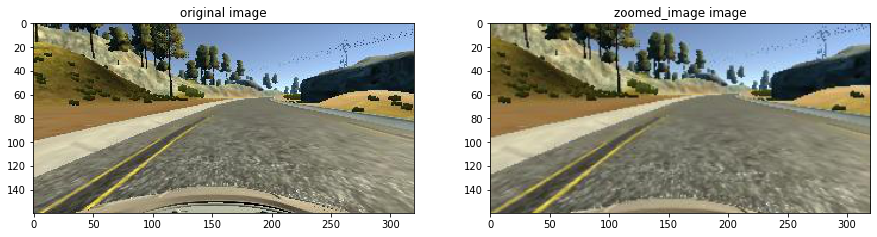

In [87]:
image_path = image_paths[random.randint(0, 650 )]
original_image = mpimg.imread(image_path)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(zoomed_image)
axs[1].set_title('zoomed_image image')

In [0]:
def pan(img):
    pan = iaa.Affine(translate_percent={'x': (-0.1,0.1), 'y': (-0.1,0.1)})
    img = pan.augment_image(img)
    return img

Text(0.5, 1.0, 'panned image')

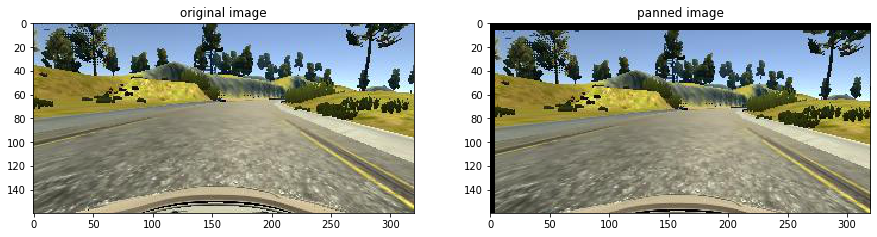

In [89]:
image_path = image_paths[random.randint(0, 650 )]
original_image = mpimg.imread(image_path)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(panned_image)
axs[1].set_title('panned image')

In [0]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = - steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'panned image, angle: 0.16298320000000002')

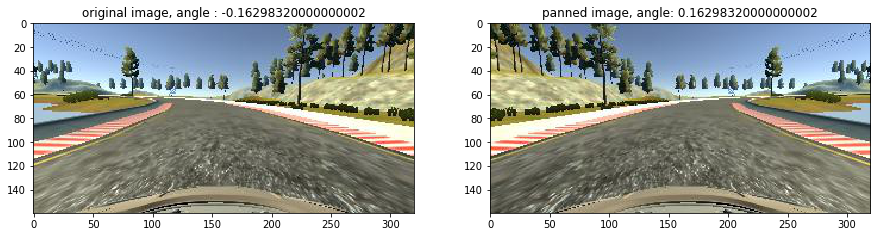

In [91]:
rand_index = random.randint(0, 650);
image_path = image_paths[rand_index]
steering = steerings[rand_index]
original_image = mpimg.imread(image_path)

flip_image, flip_steering = img_random_flip(original_image, steering)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(original_image)
axs[0].set_title('original image, angle : '+str(steering))
axs[1].imshow(flip_image)
axs[1].set_title('panned image, angle: '+str(flip_steering))

In [0]:
def img_random_brightness(img):
    brightness = iaa.Multiply((0.2, 1.2))
    img = brightness.augment_image(img)
    return img

Text(0.5, 1.0, 'bright image')

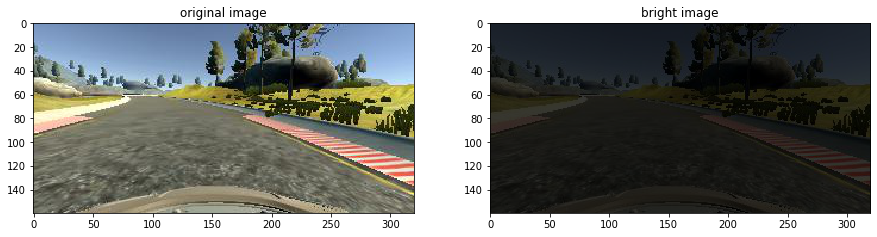

In [93]:
image_path = image_paths[random.randint(0, 650 )]
original_image = mpimg.imread(image_path)
bright_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(bright_image)
axs[1].set_title('bright image')

In [0]:
def random_augment(image, steering_angle):
    if np.random.rand() < 0.5:
        # print('panning')
        image = pan(image)
    if np.random.rand() < 0.5:
        # print('zooming')
        image = zoom(image)
    if np.random.rand() < 0.5:
        # print('brightenning')
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        # print('flipping')
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

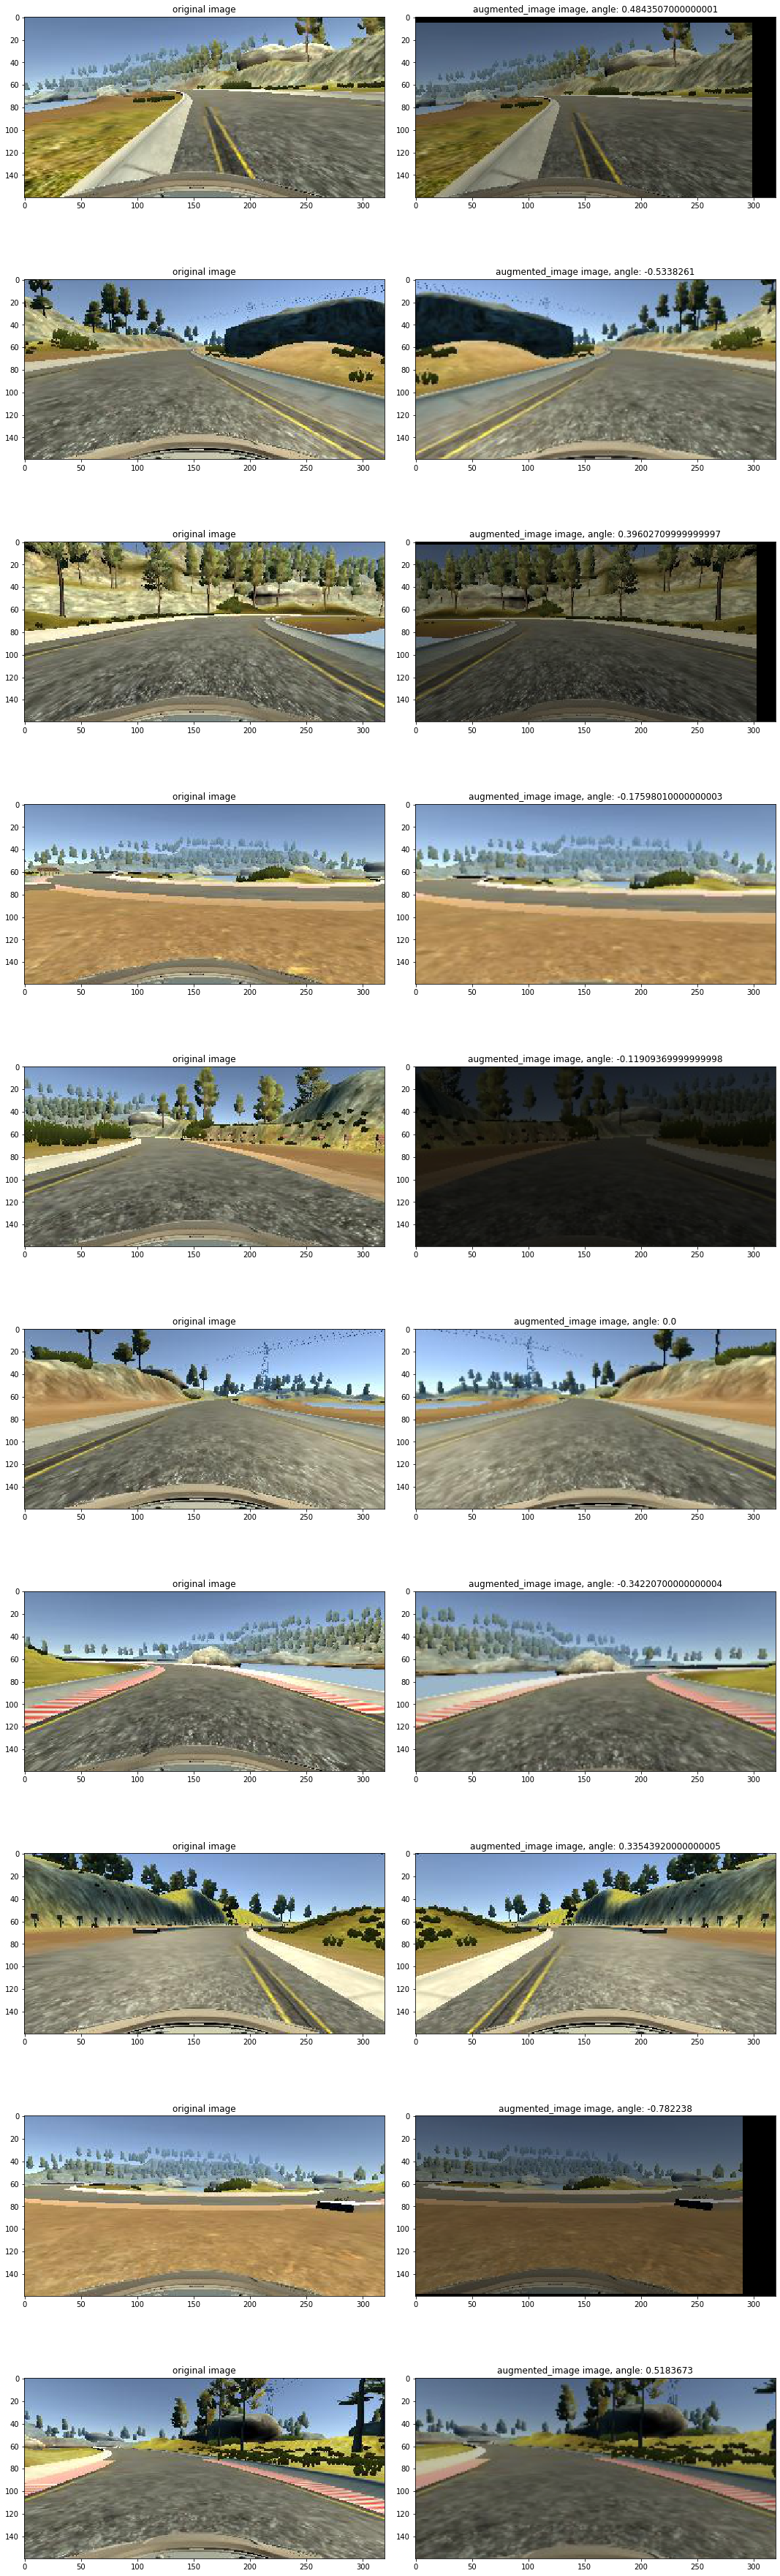

In [95]:
ncol =2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15,50))
fig.tight_layout()

for i in range(10):
    randNum = random.randint(0, len(image_paths)-1)
    randImage = image_paths[randNum]
    randSteering = steerings[randNum]

    original_image= mpimg.imread(randImage)
    
    axs[i][0].imshow(original_image)
    axs[i][0].set_title('original image')

    augmented_image, steering = random_augment(original_image, randSteering)


    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title('augmented_image image, angle: '+str(randSteering))

In [0]:
def img_preprocess(img):
    img = img[60:135, :, :] # strip top and bottom
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0) # 3x3 Kernal, 0-deviation
    img = cv2.resize(img, (200, 66)) # 200x66 - Matches NVIDEA
    img = img / 255
    return img

Text(0.5, 1.0, 'preprocessed image')

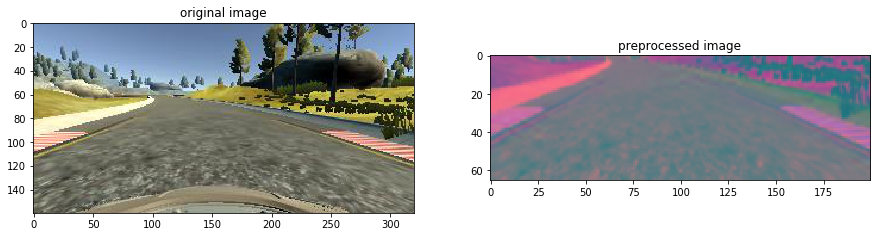

In [97]:
image_path = image_paths[100]
original_image = mpimg.imread(image_path)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprocessed image')

In [0]:
# X_train = np.array(list(map(img_preprocess, X_train)))
# X_valid = np.array(list(map(img_preprocess, X_valid)))

In [0]:
# plt.imshow(X_train[random.randint(0, len(X_train) -1 )])
# plt.axis('off')
# print(X_train.shape)

In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths)-1)
            im = mpimg.imread(image_paths[random_index])

            if istraining:
                im, steering = random_augment(im, steering_ang[random_index])
            else:
                steering = steering_ang[random_index] 

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.array(batch_steering))

Text(0.5, 1, 'Validation image')

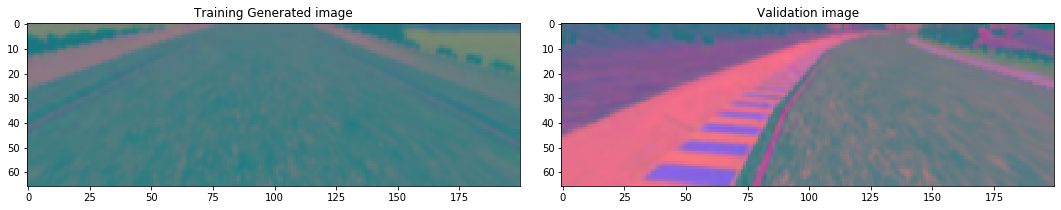

In [106]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(X_train_gen[0])
axs[0].set_title('Training Generated image')

axs[1].imshow(X_valid_gen[0])
axs[1].set_title('Validation image')

In [0]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, 5, 5, subsample=(2,2), input_shape=(66, 200, 3), activation='relu'))
    model.add(Conv2D(36, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Conv2D(48, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Conv2D(64, 3, 3, activation='elu'))
    model.add(Conv2D(64, 3, 3, activation='elu'))
    # model.add(Dropout(0.5))
   
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    # model.add(Dropout(0.5))
   
    model.add(Dense(50, activation='elu'))
    # model.add(Dropout(0.5))
    model.add(Dense(10, activation='elu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(lr=1e-4))
    return model

In [103]:
model = nvidia_model()
print(model.summary)

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f1e35b49780>>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), ac

In [107]:
history = model.fit_generator(batch_generator(X_train, y_train, 150, 1),
                              steps_per_epoch=300, 
                              epochs=10, 
                              validation_data=batch_generator(X_valid, y_valid, 100, 0), 
                              validation_steps=200, 
                              verbose=1, 
                              shuffle=1)

Epoch 1/10





300/300 [==============================] - 315s 1s/step - loss: 0.1471 - val_loss: 0.0782
Epoch 2/10
300/300 [==============================] - 304s 1s/step - loss: 0.1058 - val_loss: 0.0767
Epoch 3/10
300/300 [==============================] - 305s 1s/step - loss: 0.0950 - val_loss: 0.0660
Epoch 4/10
300/300 [==============================] - 304s 1s/step - loss: 0.0907 - val_loss: 0.0623
Epoch 5/10
300/300 [==============================] - 307s 1s/step - loss: 0.0854 - val_loss: 0.0637
Epoch 6/10
300/300 [==============================] - 305s 1s/step - loss: 0.0802 - val_loss: 0.0591
Epoch 7/10
300/300 [==============================] - 305s 1s/step - loss: 0.0778 - val_loss: 0.0629
Epoch 8/10
300/300 [==============================] - 304s 1s/step - loss: 0.0735 - val_loss: 0.0623
Epoch 9/10
300/300 [==============================] - 302s 1s/step - loss: 0.0706 - val_loss: 0.0601
Epoch 10/10
300/300 [==============================] - 304s 1s/step - loss: 0.0670 - v

Text(0.5, 1.0, 'loss')

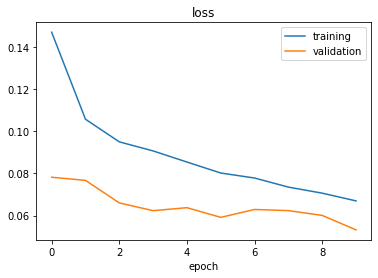

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.title('loss')

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')